# SymPy 2022 Documentation Theme Survey Analysis

# Methodology

SymPy ran a user survey about its documentation theme from February 5-19, 2022. The primary purpose of the survey was to guide the selection of a Sphinx theme for the SymPy Documentation at https://docs.sympy.org. 

A total of 22 people responded. The survey was done on Google Surveys and was shared on the SymPy public mailing list, the [@SymPy](https://twitter.com/SymPy) Twitter account, and a [SymPy discussion on GitHub](https://github.com/sympy/sympy/discussions/23055). The survey consisted of 14 questions, all of which were optional. The results of these responses are summarized here. We would like to thank everyone who took and shared the survey.

Four themes were [chosen based on factors such as layout, navigation, performance, and accessibility](https://github.com/sympy/sympy/issues/22716) for evaluation by the SymPy community. Each theme was "prototyped" by
 - Applying the theme to the SymPy dev documentation
 - Removing SymPy Live, which has several problems, is [planned to be removed in the live documentation](https://github.com/sympy/sympy/issues/22835), and affects the formatting of the documentation site due to importing a style sheet
 - [Hosting them on GitHub Pages](https://bertiewooster.github.io/sympy-doc/)

No attempt was made to customize the four themes because that is anticipated to be a time-consuming process with both technical (styling) and consensus-building components. Respondents were thus encouraged to focus on the layout, navigation, and interactive features, rather than the exact styling, for example colors.

For each of the four themes, respondents were asked to
 - Rate the theme's usefulness of a scale of 1 (Not very useful) to 4 (Very useful)
 - Share what they liked and disliked

# Summary

A detailed analysis of the responses is provided below. At a high level, there are three main takeaways from the results.

1. The themes can be divided into three ratings categories, where the rating scale was 1 (Not very useful) to 4 (Very useful):
    1. Highest: Furo at 2.95.
    2. Middle: PyData and Book, nearly tied at 2.85 and 2.86, respectively.
    3. Lowest: Read the Docs (RTD) at 2.47.

2. Most comments about themes, both likes and dislikes, were about formatting, look and feel, and navigation.

3. We should proceed with the Furo theme, customizing it to address respondents' dislikes about its formatting. We can keep the PyData and Book themes in mind as backup options.

In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt

import textwrap

# Set the plot format to SVG for better quality plots
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

In [2]:
df = pandas.read_csv('theme-responses.csv')

In [3]:
# Set up columns, themes, colors
timestamp, experience_level, pydata_rating, pydata_like, pydata_dislike, book_rating, book_like, book_dislike, furo_rating, furo_like, furo_dislike, rtd_rating, rtd_like, rtd_dislike, other_comments,  = df.columns

rating_cols = [pydata_rating, book_rating, furo_rating, rtd_rating]

themes = ["PyData", "Book", "Furo", "RTD"]
n_themes = len(themes)
theme_colors = ["blue", "red", "yellow", "green"]

n_responses = len(df)

In [4]:
## Functions to determine complimentary color
## https://stackoverflow.com/questions/40233986/python-is-there-a-function-or-formula-to-find-the-complementary-colour-of-a-rgb

# Sum of the min & max of (a, b, c)
def hilo(a, b, c):
    if c < b: b, c = c, b
    if b < a: a, b = b, a
    if c < b: b, c = c, b
    return a + c

# Get complimentary color
def complement(r, g, b):
    k = hilo(r, g, b)
    return tuple(k - u for u in (r, g, b))

## Experience Level

The first question asked the respondents to place their SymPy experience level on a scale of 1 to 5, with 1 being "novice user" and 5 being "expert user".

Most respondents self-reported a mid-level experience with SymPy. 

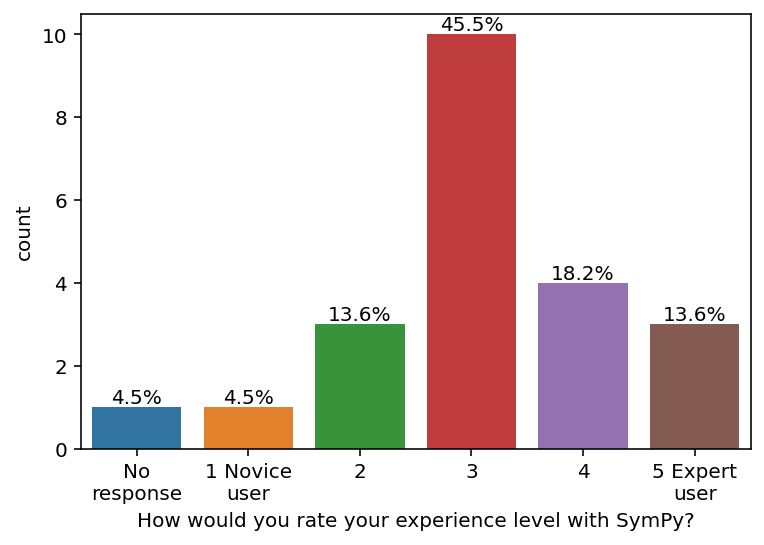

In [5]:
n_nr = df[experience_level].isna().sum()

experience_cat_nr = pandas.Series({'0': n_nr})
experience_cats_r = df[experience_level].dropna().astype(int).value_counts(sort=False).sort_index()
experience_cats = experience_cat_nr.append(experience_cats_r)

percents_experience_cats = ["%.1f%%" % i for i in experience_cats/n_responses*100]

max_width = 10

ax = seaborn.countplot(
    x = df[experience_level].fillna(0).astype(int),
)
bar_labels = ax.bar_label(ax.containers[0], percents_experience_cats, 
    )
ax.set_xticklabels(['No response', "1 Novice user", "2", "3", "4", "5 Expert user"])

# Split x tick labels across multiple lines
# https://stackoverflow.com/questions/57144682/split-string-xticks-into-multiple-lines-matplotlib
xtl = ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())

## Theme Ratings

The survey asked respondents to rate the usefulness of four themes on a 1-4 scale, with 1 being Not very useful and 4 being Very useful. The mean and standard deviation of the rating for each theme are expressed numerically and graphically as:

In [6]:
df[rating_cols].describe().transpose()[["mean","std"]].round(2)

,mean,std
How useful is the PyData theme?,2.85,0.75
How useful is the Book theme?,2.86,0.79
How useful is the Furo theme?,2.95,1.02
How useful is the Read the Docs (RTD) theme?,2.47,0.90


In [7]:
# So seaborn can automatically plot standard deviations as error bars,
# combine all ratings into one column, paired with theme
all_themes = []
for theme in themes:
    this_theme = [theme] * n_responses
    all_themes += this_theme

all_ratings = []
for col in rating_cols:
    this_theme_ratings = list(df[col])
    all_ratings += this_theme_ratings

df_combined = pandas.DataFrame(list(zip(all_themes, all_ratings)), columns = ['theme', 'rating'])


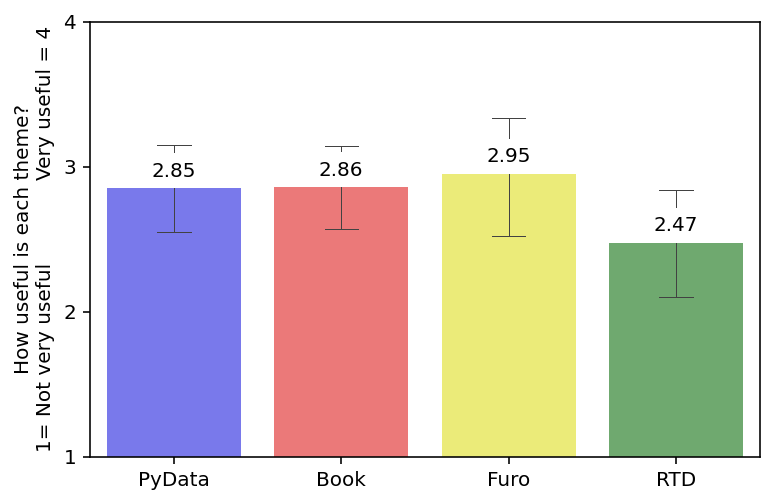

In [8]:
rating_min = 1
rating_max = 4
num_bins = rating_max - rating_min + 1
rating_values = range(rating_min, rating_max + 1)

t = seaborn.barplot(
    data=df_combined, 
    x="theme", 
    y="rating",
    capsize=0.2,
    errwidth=0.5,
    palette=theme_colors, 
    alpha=.6, 
)
t.set_yticks(rating_values)
t.bar_label(
    t.containers[0], 
    # label_type = 'center', 
    fmt='%.2f',
    padding = 4,
    bbox=dict(
        fc = "white", 
        lw = 0,
    )
)

y_label = f"How useful is each theme?\n{rating_min}"
y_label += "= Not very useful" + "             " + f"Very useful = {rating_max}"

t.set(xlabel='', ylabel=y_label)
t.set(ylim=(rating_min,rating_max))

t.grid(False)

Furo is the highest-rated theme by about 0.1 points. PyData and Book are virtually tied for second place. Read the Docs is rated lowest, about 0.5 points below Furo.

## Rating Distribution for Themes

For each theme, a histogram displays the count of responses for each rating level, from 1 to 4, and the dashed vertical line indicates the mean rating.

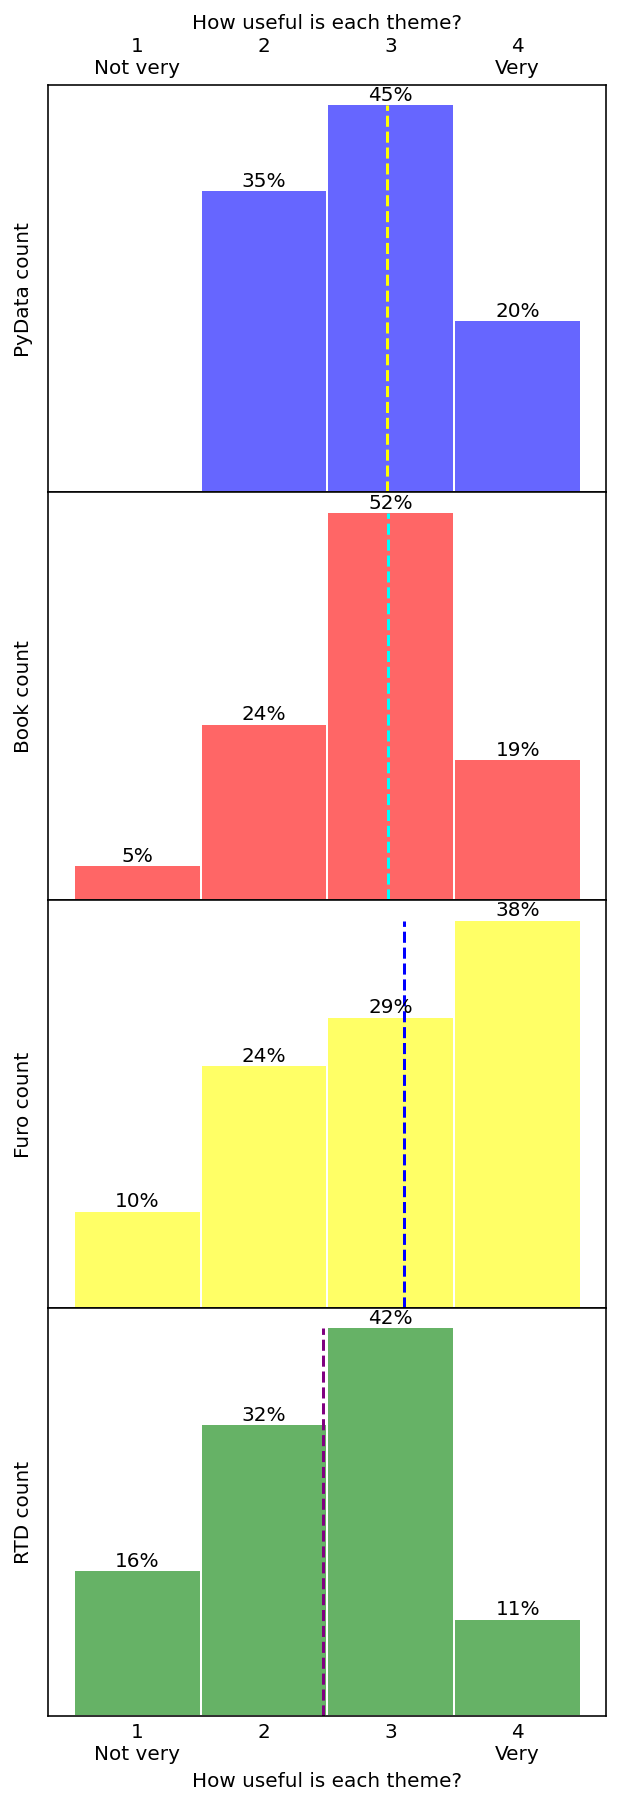

In [9]:
import matplotlib
import matplotlib.ticker as mticker

fig, axes = plt.subplots(n_themes, figsize=(5, 15))
plt.subplots_adjust(hspace = 0)

for theme_num, theme in enumerate(themes):
    graph = seaborn.histplot(
    ax=axes[theme_num],
    data=df,
    x = rating_cols[theme_num],
    bins = num_bins,
    binrange=[rating_min,rating_max],
    color=theme_colors[theme_num],
    alpha = 0.6,
    edgecolor="white"
    )
    
    ## Add vertical line at mean of each theme

    # Get RGB of bar's color
    bar_rgb = matplotlib.colors.to_rgb(theme_colors[theme_num])
    line_rgb = complement(*bar_rgb)

    #   https://datavizpyr.com/how-to-add-a-mean-median-line-to-a-seaborn-displot/
    graph.axvline(x=df[rating_cols[theme_num]].mean(),
        ls='--',
        color=line_rgb,
        ymax = 0.95
    )
    graph.set(ylabel=themes[theme_num] + " count")
    graph.grid(False)             # remove gridlines
    graph.set(yticklabels=[])     # remove y-axis tick labels

    # Add labels to bars: Percents
    theme_cats = df[rating_cols[theme_num]].dropna().astype(int).value_counts(sort=False).sort_index()

    # Ensure each bar has an entry in list
    denom = sum(theme_cats) / 100
    percents_cats = []
    for cat in range(rating_min, rating_max + 1):
        if cat in theme_cats:
            pct = theme_cats[cat] / denom
            percents_cats += ["%.0f%%" % pct]
        else:
            percents_cats += [""]

    l = graph.bar_label(
        graph.containers[0], 
        percents_cats, 
        )

    # Hide tick marks by making them zero length
    graph.tick_params(length = 0)

    if theme_num in range(1, n_themes - 2):
        # For graphs in the middle (neither top nor bottom),
        #   remove x axis and tick labels
        graph.set(xlabel='')
        graph.set_xticklabels([])
    else:
        # For graphs at top and bottom,
        #   show x-axis title and tick labels

        # Fixing yticks with matplotlib.ticker "FixedLocator"
        #   https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator
        label_format = '{:,.0f}'
        ticks_loc = graph.get_xticks().tolist()
        graph.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        graph.set_xticklabels([label_format.format(x) for x in ticks_loc])

        # Center labels on bars (columns)
        #   https://stackoverflow.com/questions/63516973/how-can-i-mark-xticks-at-the-center-of-bins-for-a-seaborn-distplot
        mids = [rect.get_x() + rect.get_width() / 2 for rect in graph.patches]
        graph.set_xticks(mids)

        graph.set(xlabel='How useful is each theme?')
        graph.set_xticklabels(['1\nNot very','2\n','3\n','4\nVery'])

        if theme_num == 0:
            graph.xaxis.set_ticks_position("top")
            graph.xaxis.set_label_position("top")


For Furo, the mode is 4, Very useful. The mode of the other three themes is 3.

# Furo theme

Given that Furo is the highest-rated theme, it is worth considering other factors before deciding to proceed with it.

## Comments about Furo
Here are consolidated lists of highlights from what respondents liked and disliked about Furo.
- Like
   - Clean look and clear font
   - Left and right sidebars for site and page navigation, respectively
   - Has both light and dark themes, and is easy to switch between them
- Dislike
   - Colors are distracting (for example, behind code blocks), too dark without enough contrast 
   - Bold and highlighting seem a little cartoonish
   - Not more widely used in documentation for data science packages
   - Collapse of in-page navigation not optimal

## Other factors
 - Furo SymPy prototype gets excellent [Lighthouse scores](https://googlechrome.github.io/lighthouse/viewer/?psiurl=https%3A%2F%2Fbertiewooster.github.io%2Fsympy-doc%2Ffuro%2Fmodules%2Fassumptions%2Findex.html%23querying&strategy=desktop&category=performance&category=accessibility&category=best-practices&category=seo&category=pwa&utm_source=lh-chrome-ext) before any customization:
    - Performance: 100
    - Accessibility: 98
    - Best Practices: 100
    - SEO (search engine optimization): 90
 - Furo is well supported, having frequent updates
 - Furo's developer is very accessible, even [commenting on a SymPy thread](https://github.com/sympy/sympy/issues/22716#issuecomment-1013016667) without our asking them
 - ["Pretty much every color on the screen is customizable"](https://pradyunsg.me/furo/customisation/colors/#defining-overrides-for-defaults) per Furo's developer so we should be able to address what respondents disliked about colors
 - Furo is the only theme that shows a fully expanded table of contents on the right sidebar
 - Furo was recommended by Joannah Nanjekye, who spent much time working on the documentation for [2021 Google Season of Docs](https://github.com/sympy/sympy/wiki/GSoD-2021-Report-Joannah-Nanjekye:-Reorganizing-the-SymPy-Documentation)

# Recommendation
For the above reasons, we should proceed with Furo as the new Sphinx theme. Customizing the theme should address some of the deficits of the prototype, such as colors.

Should there be some unexpected reason we cannot customize Furo as desired, we could try PyData or Book.

# Other comments from respondents

Finally, nine people responded to "Are there any other comments you'd like to make?". Here is a summary of some things that stood out. 

- All four options are good.
- Whichever theme you go with it’ll be an improvement.
- Please use that nice dark mode

# Appendix: All comments from respondents

For the sake of completeness, all comments are shown below.

In [10]:
def print_answers(col):
    i = 1
    for e, v in df[[experience_level,col]].iloc:
        if pandas.isna(v):
            continue
        print(f"{i}. {v.strip()} (experience level: {int(e) if not pandas.isna(e) else 'N/A'})\n")
        i += 1

In [11]:
tag = "---"
for name, values in df.iteritems():
    if "like" in str(name).lower():
        print(tag + " " + name + " " + tag)
        print_answers(name)

--- What do you LIKE about the PyData theme? ---
1. search easy to find, updating position in doc on right (experience level: 5)

2. It is a neat theme (experience level: 4)

3. Clear, succint, very little clutter (experience level: 5)

4. I like the clean layout. (experience level: 4)

5. It is neat and simple, with left and right sidebars proving useful. The top sidebar is also quite convenient since scrolling on the left sidebar would be reduced as opposed to themes which lack the top sidebar. (experience level: 3)

6. clear view without distractions (experience level: 2)

7. Flat design, style uniformity accros sur the data exosystem, maintainability of a shared product (experience level: N/A)

8. The docstring rendering is easier to read than the old docs page. Better colors and less clutter. Fits on screen better. (experience level: 3)

9. Readable, not a huge shift (experience level: 3)

10. Desktop: Clean look. The categories across the top. The search box in a fixed position o